In [1]:
import os

os.chdir("../") # Change working directory to root of the project

In [2]:
import re
import warnings

import nltk
import pandas as pd
from nltk.corpus import stopwords

from prompt_classifier.plots import plot_common_words, plot_word_count

warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
general_df = pd.read_csv('data/interim/general_prompts.csv')
finance_df = pd.read_csv('data/interim/finance_prompts.csv')
healthcare_df = pd.read_csv('data/interim/healthcare_prompts.csv')
law_df = pd.read_csv('data/interim/law_prompts.csv')


dataframes = {"general_prompts": general_df, "finance_prompts": finance_df,
              "healthcare_prompts": healthcare_df, "law_prompts": law_df}

In [5]:
def preprocess_text(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    clear_output = str(' '.join(words))

    if not clear_output:
        return None

    return clear_output

In [6]:
for key, df in dataframes.items():
    df['prompt'] = df['prompt'].apply(preprocess_text)
    df = df[df['prompt'].apply(lambda x: isinstance(x, str))]
    df = df.head(20_000)
    df.to_csv(f'data/processed/{key}.csv', index=False)

In [7]:
general_df_cleaned = pd.read_csv('data/processed/general_prompts.csv')
finance_df_cleaned = pd.read_csv('data/processed/finance_prompts.csv')
healthcare_df_cleaned = pd.read_csv('data/processed/healthcare_prompts.csv')
law_df_cleaned = pd.read_csv('data/processed/law_prompts.csv')

dataframes_cleaned = {"general_prompts": general_df_cleaned, "finance_prompts": finance_df_cleaned, "healthcare_prompts": healthcare_df_cleaned, "law_prompts": law_df_cleaned}

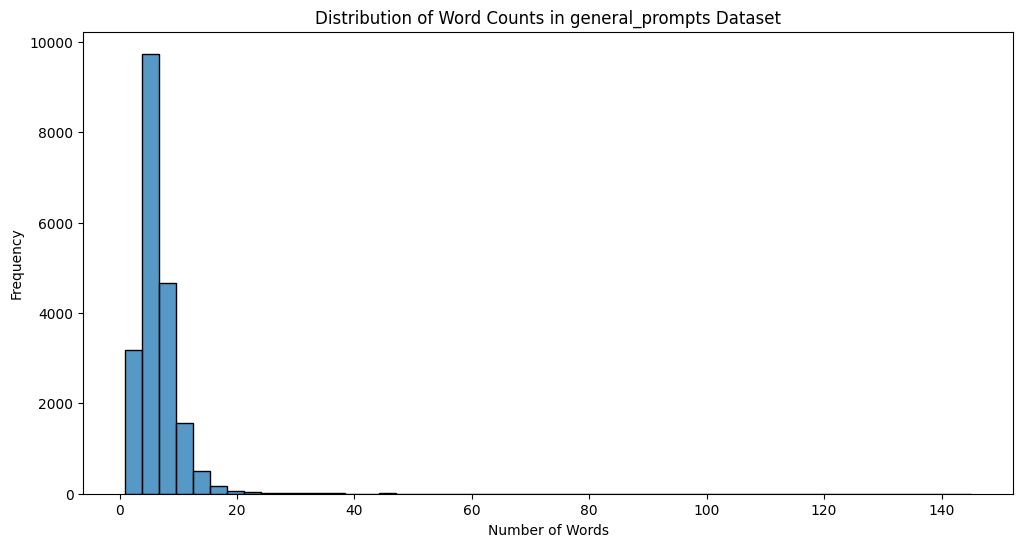

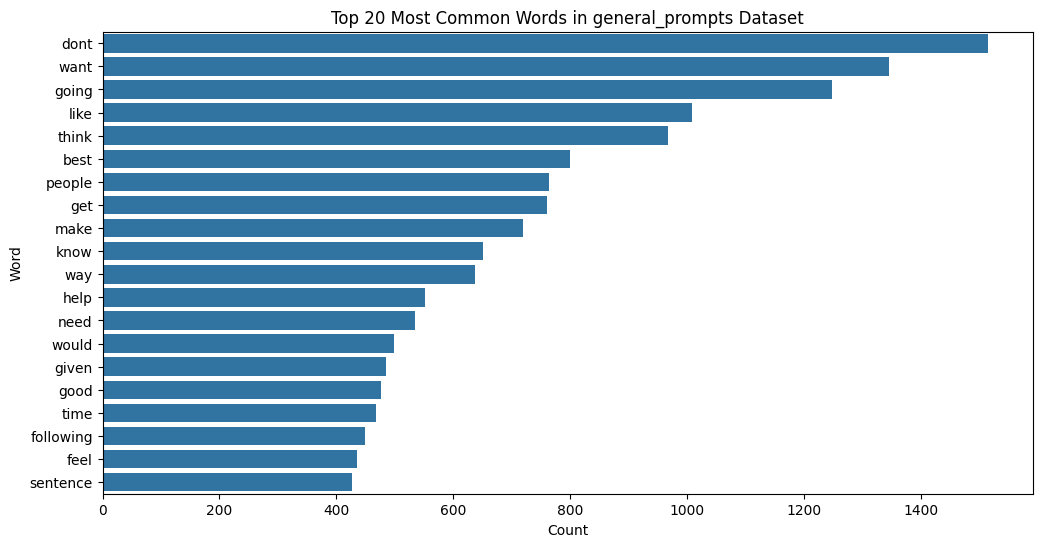

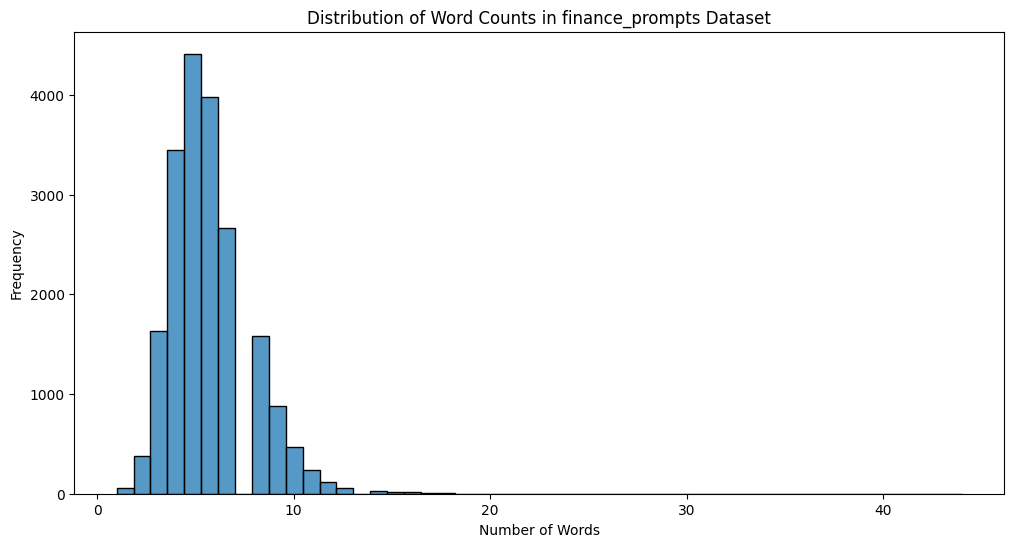

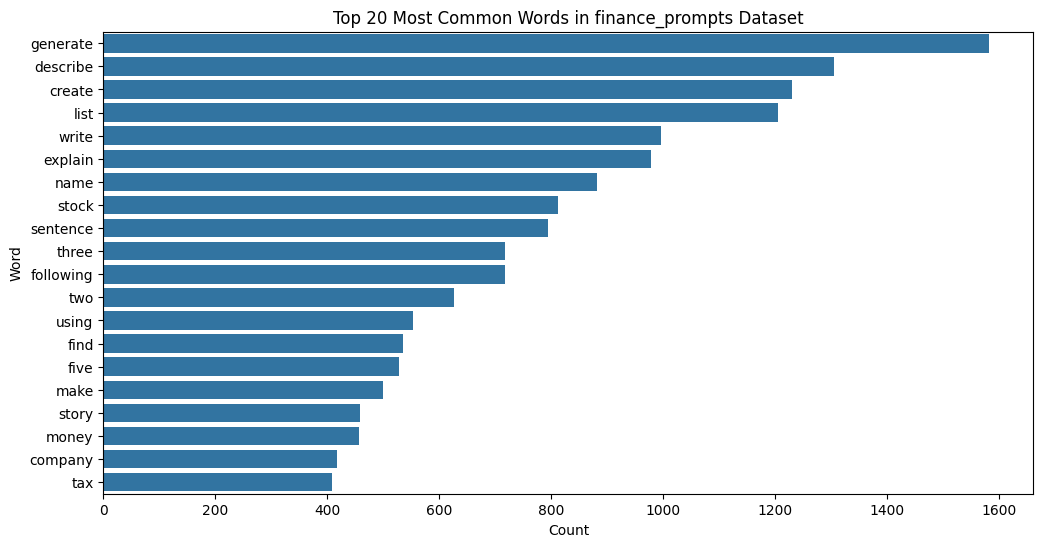

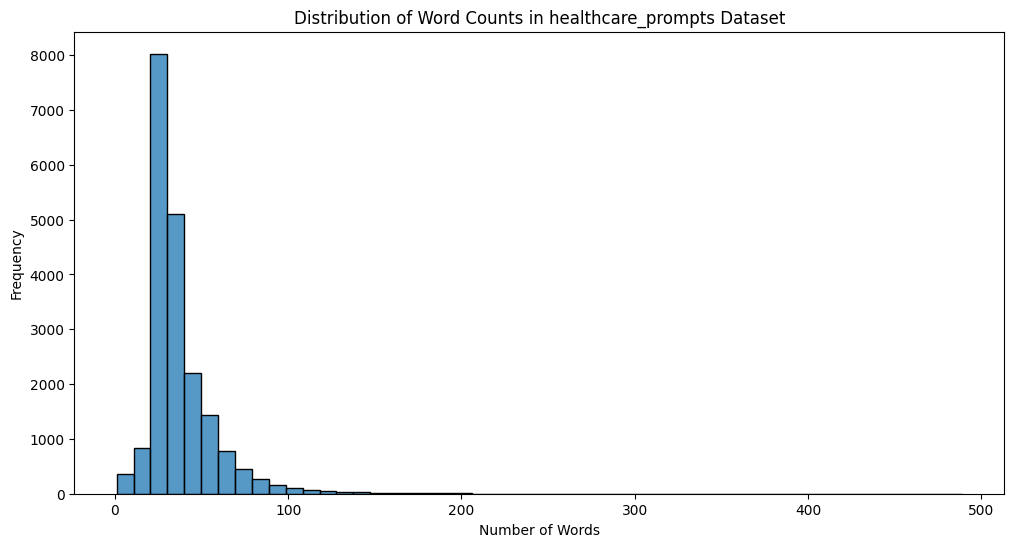

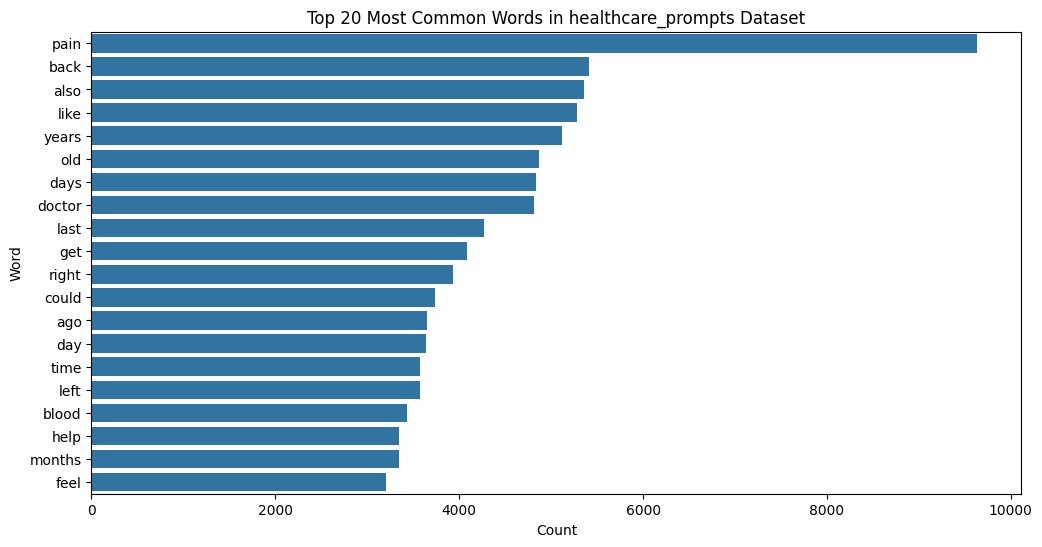

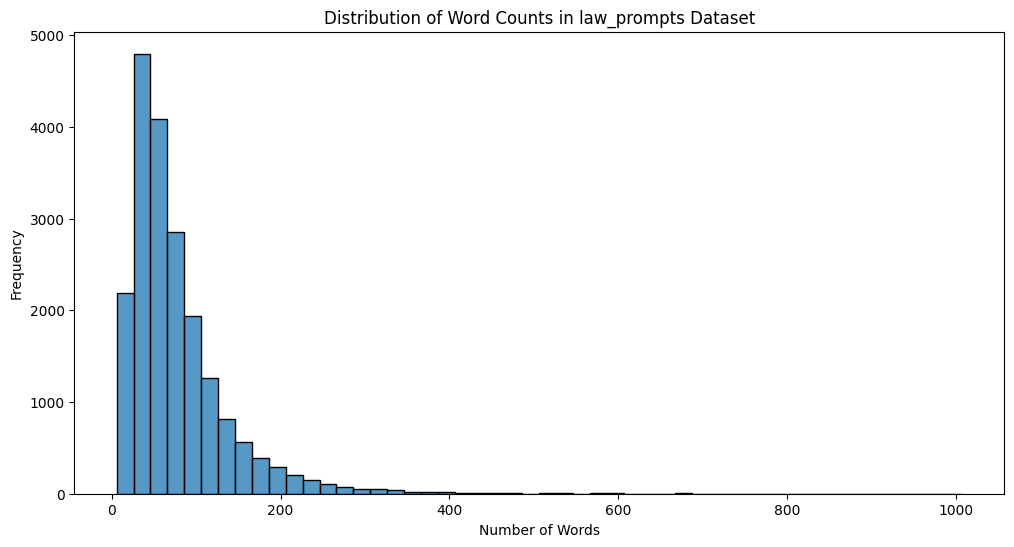

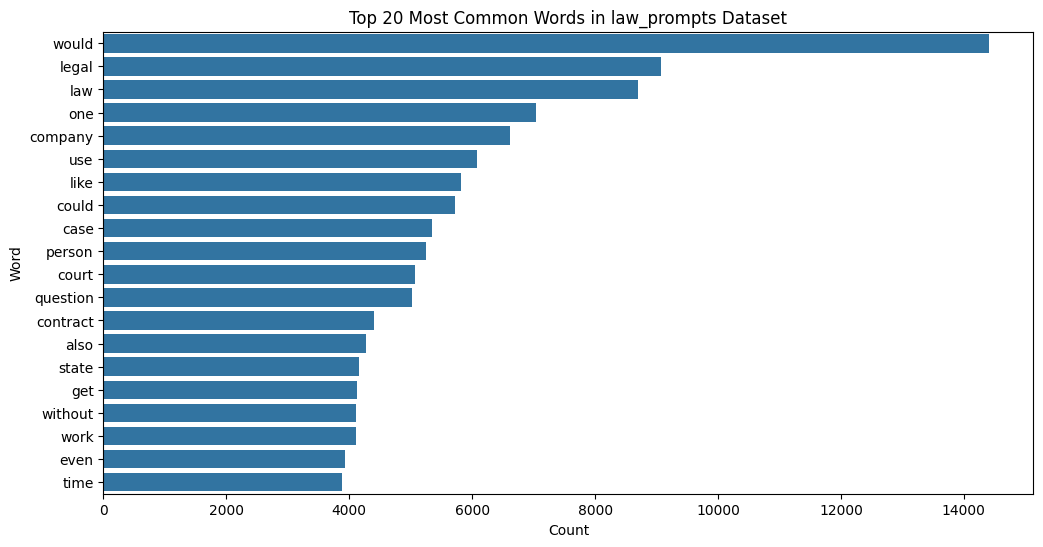

In [8]:
for key, df in dataframes_cleaned.items():
    plot_word_count(df, key)
    plot_common_words(df, key)